# Auswertung 200218_21

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_21"
campaign_id    = "03_Verifikation_2"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

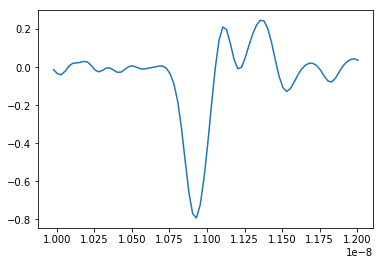

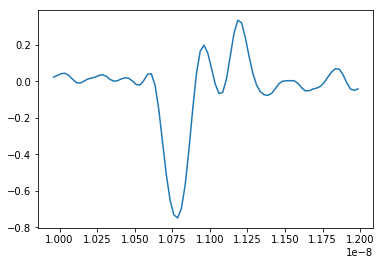

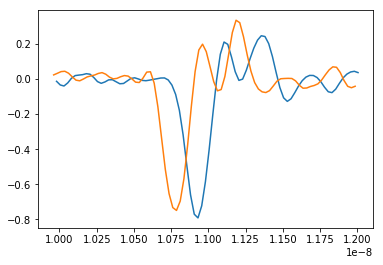

In [8]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

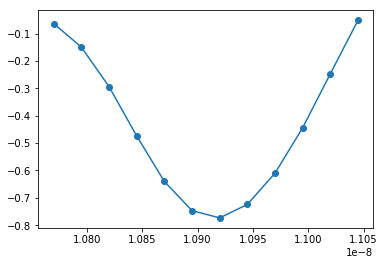

In [9]:
areaMinC1 = 32
areaMaxC1 = 44
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

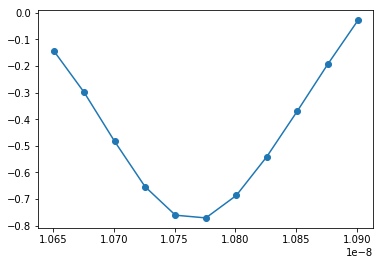

In [10]:
areaMinC3 = 27
areaMaxC3 = 38
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [11]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.09e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [12]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [13]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

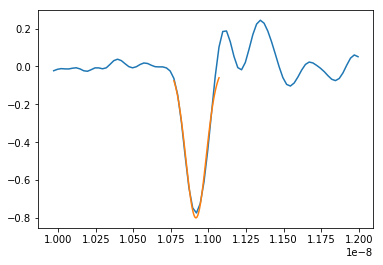

parameter: [-1.35069669e-10  1.09164300e-08  6.74095913e-11] [A, mu, sigma]


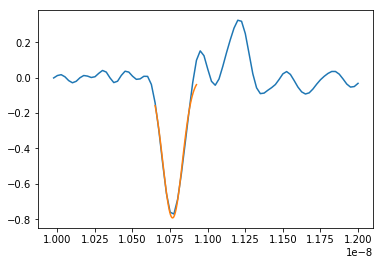

parameter: [-1.28513868e-10  1.07668435e-08  6.46401426e-11] [A, mu, sigma]


In [14]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

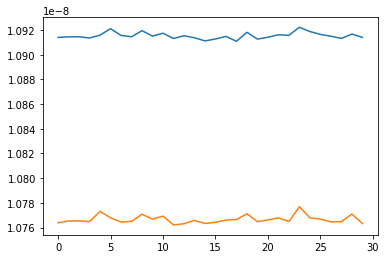

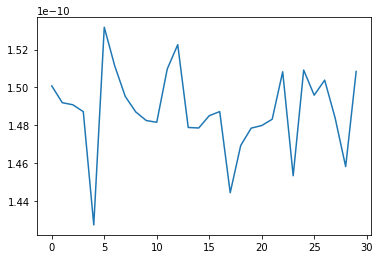

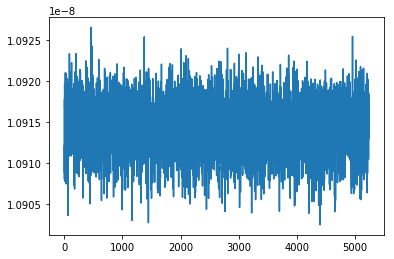

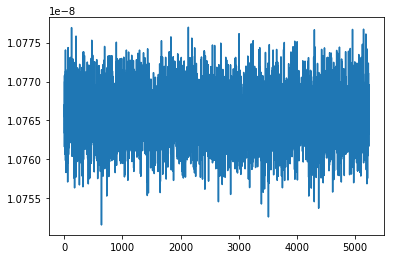

In [15]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [16]:
JitterGauss = jitter(C1, C3, axis = 1)

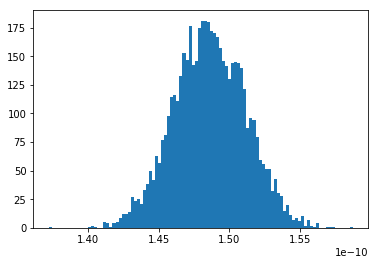

In [17]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

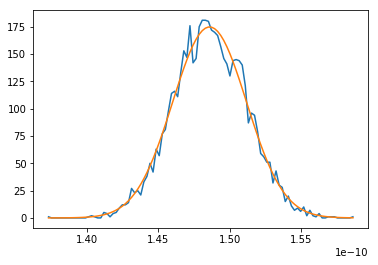

parameter: [1.13629800e-09 1.48601209e-10 2.59219794e-12] [A, mu, sigma]


In [18]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.5e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [19]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 2.592197942455562 ps
σ_1: 1.8329607432881438 ps
σ_1 = σ_0 / sqrt(2)

μ: 148.6012087707989 ps

coma separated [σ_0, σ_1, μ]
2.592197942455562e-12,1.8329607432881437e-12,1.486012087707989e-10

 tab separated [σ_0, σ_1, μ]
2.592197942455562e-12	1.8329607432881437e-12	1.486012087707989e-10


## algorithm 2: min

In [20]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [21]:
factor = 0.5

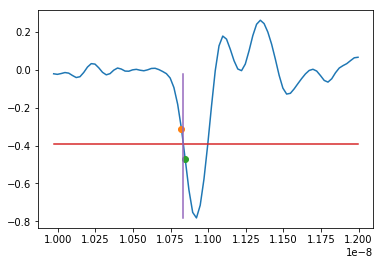

xt: 1.0834273768369159e-08 ps, yt -0.3913505326891027 ps


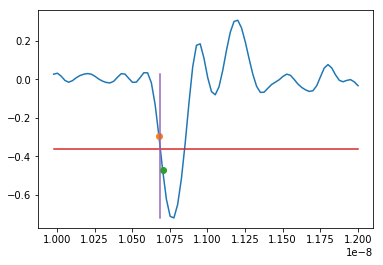

xt: 1.0686825027797529e-08 ps, yt -0.36038213999563595 ps


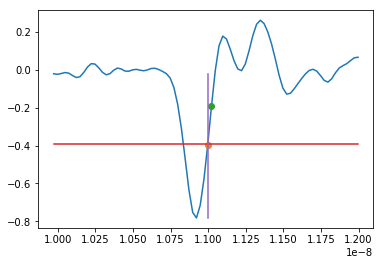

xt: 1.0997184419941488e-08 ps, yt -0.3913505326891027 ps


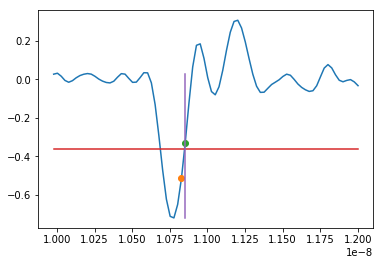

xt: 1.0848517230651775e-08 ps, yt -0.36038213999563595 ps


In [22]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [24]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [25]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

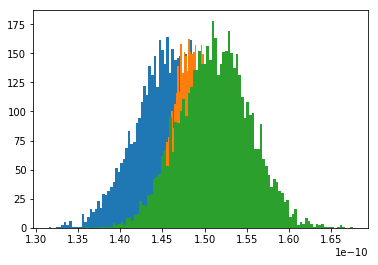

In [26]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

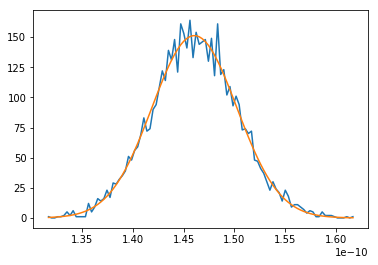

parameter: [1.58443801e-09 1.46046196e-10 4.17832370e-12] [A, mu, sigma]


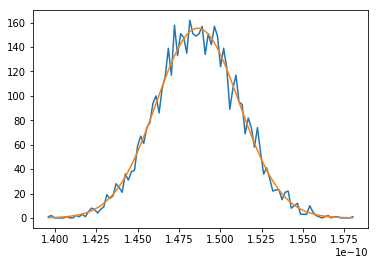

parameter: [9.78028285e-10 1.48635621e-10 2.50926125e-12] [A, mu, sigma]


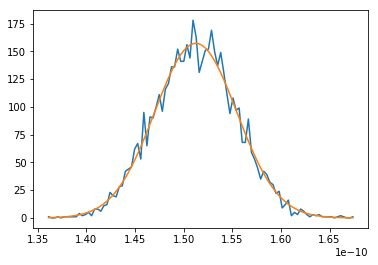

parameter: [1.66261867e-09 1.51248537e-10 4.21884198e-12] [A, mu, sigma]


In [27]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.47e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.5e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.53e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [28]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 4.178323701326555 ps
σ_1: 2.9545210232004817 ps
σ_1 = σ_0 / sqrt(2)

μ: 146.04619617911234 ps

coma separated [σ_0, σ_1, μ]
4.178323701326555e-12,2.9545210232004815e-12,1.4604619617911234e-10

 tab separated [σ_0, σ_1, μ]
4.178323701326555e-12	2.9545210232004815e-12	1.4604619617911234e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 2.5092612500364644 ps
σ_1: 1.7743156456694167 ps
σ_1 = σ_0 / sqrt(2)

μ: 148.63562097054728 ps

coma separated [σ_0, σ_1, μ]
2.5092612500364643e-12,1.7743156456694166e-12,1.4863562097054727e-10

 tab separated [σ_0, σ_1, μ]
2.5092612500364643e-12	1.7743156456694166e-12	1.4863562097054727e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 4.21884198154783 ps
σ_1: 2.9831717739069616 ps
σ_1 = σ_0 / sqrt(2)

μ: 151.24853711070347 ps

coma separated [σ_0, σ_1, μ]
4.21884198154783e-12,2.9831717739069615e-12,1.5124853711070347e-10

 tab separated [σ_0, σ_1, μ]
4.21884198154783e-12	2.9831